# Silicon nanowire

Here we compute band structure of a silicon hydrogen-passivated infinie nanowire. The nanowire width equals two crystall latices of bulk silicon. The nanowire is translated along [001] crystalographic axis of silicon.

## 0. Prerequisites

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tb

## 1. Specify basis sets
Here we use two predefined basis sets, called 'SiliconSP3D5S' and 'HydrogenS', stored in the progamm.

In [2]:
a_si = 5.50
PRIMITIVE_CELL = [[0, 0, a_si]]
tb.Atom.orbital_sets = {'Si': 'SiliconSP3D5S', 'H': 'HydrogenS'}

h = tb.Hamiltonian(xyz='../input_samples/SiNW.xyz', nn_distance=2.4)
h.initialize()
h.set_periodic_bc(PRIMITIVE_CELL)

## 2. Band structure computation

In [3]:
num_points = 20
kk = np.linspace(0, 3.14 / a_si, num_points, endpoint=True)
band_sructure = []

for jj in xrange(num_points):
    vals, _ = h.diagonalize_periodic_bc([0.0, 0.0, kk[jj]])
    band_sructure.append(vals)

band_sructure = np.array(band_sructure)


## 3. Visualization

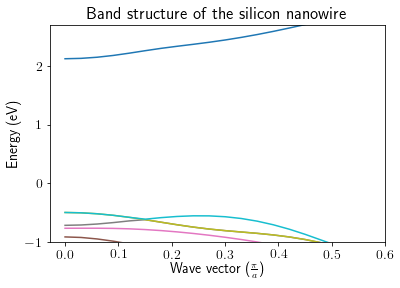

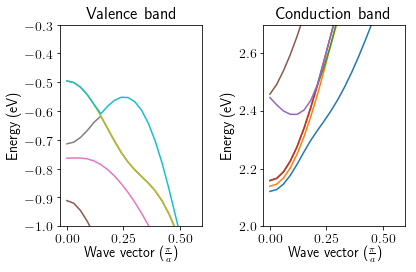

In [27]:
split = 100
fig, ax = plt.subplots(1, 2)
ax[0].set_ylim(-1.0, -0.3)
ax[0].plot(kk, np.sort(np.real(band_sructure))[:, :split])
ax[0].set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax[0].set_ylabel(r'Energy (eV)')
ax[0].set_title('Valence band')

ax[1].set_ylim(2.0, 2.7)
ax[1].plot(kk, np.sort(np.real(band_sructure))[:, split:])
ax[1].set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax[1].set_ylabel(r'Energy (eV)')
ax[1].set_title('Conduction band')
fig.tight_layout()
plt.show()